In [1]:
import tensorflow as tf

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
# tensorflow에서 라이브러리를 만들어놈

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)
# 데이터를 읽어 오라고 실행
# one_hot = true 로 하면 Y값을 바로 one_hot으로 처리한다.

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [9]:
nb_classes = 10  # 0 ~ 9 의 값이기에 10
X = tf.placeholder(tf.float32, [None, 784]) # MNIST DATA Shape 이 28*28 = 784
Y = tf.placeholder(tf.float32, [None, nb_classes]) # 0 ~ 9
# softmax 사용하기 위해
W = tf.Variable(tf.random_normal([784,nb_classes])) # shape 주의(입력,나가는 것)
b = tf.Variable(tf.random_normal([nb_classes]))# y의 값으로 정의

hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)
# cross-entropy 사용
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis),axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

#정확한지 평가를 하기 위해 
#arg_max로 hypothesis의 값과 실제 Y값이 같은지 봄
is_correct=tf.equal(tf.arg_max(hypothesis,1),tf.arg_max(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

In [10]:
# 학습을 할 데이터가 너무커서 조금씩 batch로 짤라서 실행
# epoch = 전체를 데이터셋을 한번 돈 것
# epoch = 100개씩 15번을 돈다
training_epochs=15
batch_size=100

Epoch: 0001  cost= 3.015018253
Epoch: 0002  cost= 1.133031775
Epoch: 0003  cost= 0.887763829
Epoch: 0004  cost= 0.765974143
Epoch: 0005  cost= 0.693134843
Epoch: 0006  cost= 0.640129996
Epoch: 0007  cost= 0.600092352
Epoch: 0008  cost= 0.570157550
Epoch: 0009  cost= 0.546373827
Epoch: 0010  cost= 0.523237964
Epoch: 0011  cost= 0.507487576
Epoch: 0012  cost= 0.492546698
Epoch: 0013  cost= 0.478231480
Epoch: 0014  cost= 0.467085786
Epoch: 0015  cost= 0.456687595
Accuracy: 0.8914
Label:  [6]
Prediction: [6]


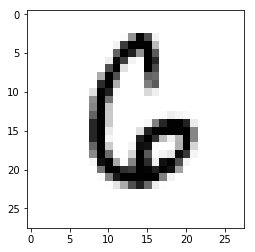

In [27]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        # epoch을 할려면 전체 데이터의 사이즈를 batch_size로 나눈 값을 반복        
        for i in range(total_batch):
            # 100개의 x와 y의 train data가 읽어진다. (메모리를 많이 차지해서 100개씩 읽음)
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
        # 이렇게 학습을 하는 것이 일반적인 방법이다.
        print('Epoch:', '%04d ' % (epoch + 1),'cost=','{:.9f}'.format(avg_cost))
    # test 데이터로 accuracy의 성능을 평가
    # sses.run() 으로 하는 방법도 있고 eval 이라는 함수를 호출하는 방법도 있다.
    # 하나의 값만 할때에는 이렇게도 한다.
    # 89% 의 정확도로 맞춘다.
    print("Accuracy:" , accuracy.eval(session=sess,
                feed_dict={X: mnist.test.images, Y:mnist.test.labels}))
    r= random.randint(0, mnist.test.num_examples-1)
    print("Label: ",sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("Prediction:", sess.run(tf.argmax(hypothesis,1),
                            feed_dict={X: mnist.test.images[r:r+1]}))
    # 이미지로 잘 확인
plt.imshow(mnist.test.images[r:r+1].reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()

In [14]:
import matplotlib.pyplot as plt
import random